<a href="https://colab.research.google.com/github/LeyanTang/ML-DL-Project/blob/main/Big_data_project_comprehensive_zara_review_sentiment_analysis%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://storage.googleapis.com/uxfolio/605123624ef6a700039fe8c8/605132294ef6a700039fe8da/F5wMPvKlvp9tDrQ7.png" width="740" height="370">

# **Project Title**: Sentiment Analysis of Zara Mobile App Store Reviews
**Introduction**:


# Web scraping and data acquisition

In [ ]:
pip install app_store_scraper

In [7]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

from app_store_scraper import AppStore
zara = AppStore(country='us', app_name='ZARA', app_id = '547951480')

zara.review(how_many=2000)

In [8]:
# convert the scraped json file to dataframe and store it in "df"
df = pd.DataFrame(np.array(zara.reviews),columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df.head()

,date,review,rating,isEdited,userName,title
0,2018-11-07 17:21:10,"My go-to for office, evening. Lazy days, gifts...",5,False,LYNJU27,The best most stylist clothing for everyone
1,2022-05-12 11:11:11,I am a small waisted curvy hip and got a nice ...,5,False,LOCQUEEN143,Just Right
2,2021-06-16 13:46:44,"Although a bit pricey for their basic designs,...",1,False,"Odom, E.",First time shopping. I’d rate Zero stars if it...
3,2019-11-07 16:14:18,I put in a large order and needed to change th...,1,False,Wolfie25242,DO NOT ORDER ONLINE!!!
4,2021-12-28 16:06:58,My review isn’t per say about the App but more...,1,False,Francj091,Customer Service Lacked


In [9]:
# inspect the data types of all columns
df.dtypes

date        datetime64[ns]
review              object
rating               int64
isEdited              bool
userName            object
title               object
dtype: object

In [10]:
# convert the datatype of two columns to string for further text analysis
df['review'] = df['review'].astype(str)
df['title'] = df['title'].astype(str)

# Descriptive analysis

### Summary statistics for ratings

In [11]:
# Calculate multiple statistics for ratings
rating_statistics = df['rating'].describe()
print(rating_statistics)

count    2000.000000
mean        3.250500
std         1.722275
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64


<Axes: ylabel='rating'>

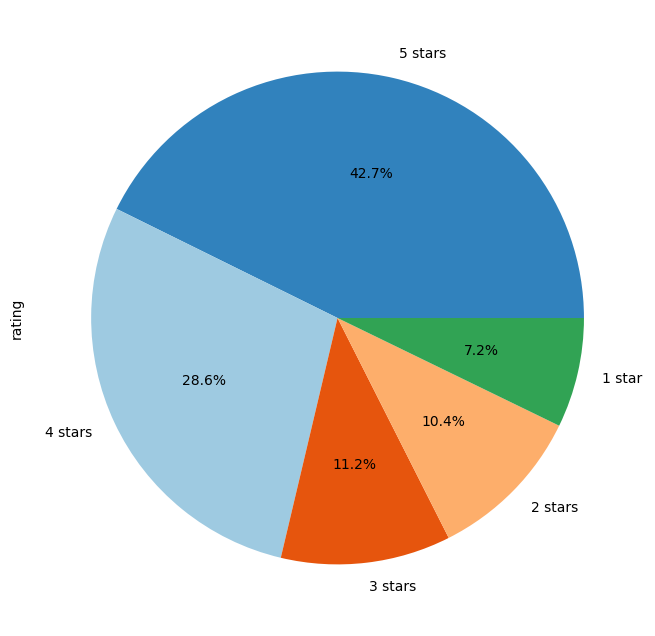

In [12]:
plt.figure(figsize=(16,8))
labels = ["5 stars", "4 stars", "3 stars", "2 stars", "1 star"]
cmap = plt.get_cmap("tab20c")
df["rating"].value_counts().plot.pie(autopct='%1.1f%%', labels=labels, colors = cmap(np.arange(5)*2))

## Review Counts by Rating

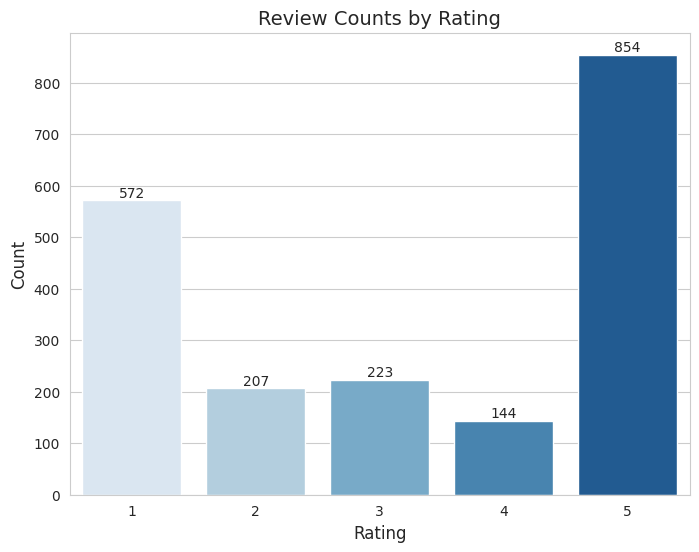

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for review counts by rating with improved aesthetics
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")  # Set the style to whitegrid

# Sort the ratings for better visualization
sorted_ratings = df['rating'].value_counts().sort_index()

# Create the bar chart
ax = sns.barplot(x=sorted_ratings.index, y=sorted_ratings, palette="Blues")

plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Review Counts by Rating', fontsize=14)

for i, count in enumerate(sorted_ratings):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

plt.show()

## Review Length and Title Length

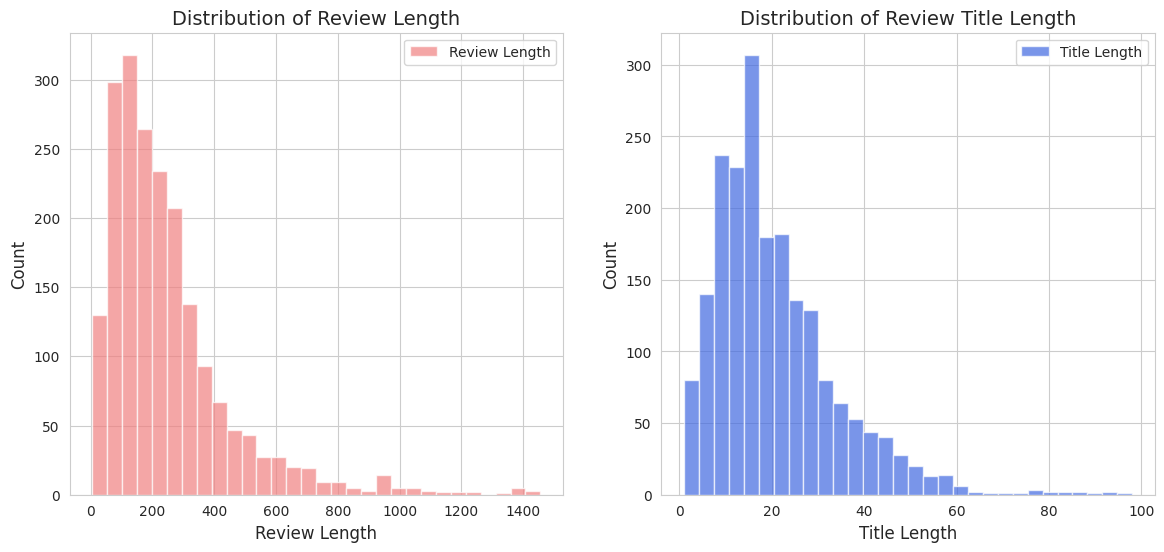

In [14]:
# Calculate the length of reviews and titles
df['review_length'] = df['review'].apply(len)
df['title_length'] = df['title'].apply(len)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the histogram for review length
ax1.hist(df['review_length'], bins=30, color='lightcoral', alpha=0.7, label='Review Length')
ax1.set_xlabel('Review Length', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_title('Distribution of Review Length', fontsize=14)
ax1.grid(True)

# Plot the histogram for title length
ax2.hist(df['title_length'], bins=30, color='royalblue', alpha=0.7, label='Title Length')
ax2.set_xlabel('Title Length', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_title('Distribution of Review Title Length', fontsize=14)
ax2.grid(True)

# Add legends
ax1.legend()
ax2.legend()

plt.show()

## Time-based distribution of reviews

<ipython-input-15-3b19f1838fec>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Apply a predefined style


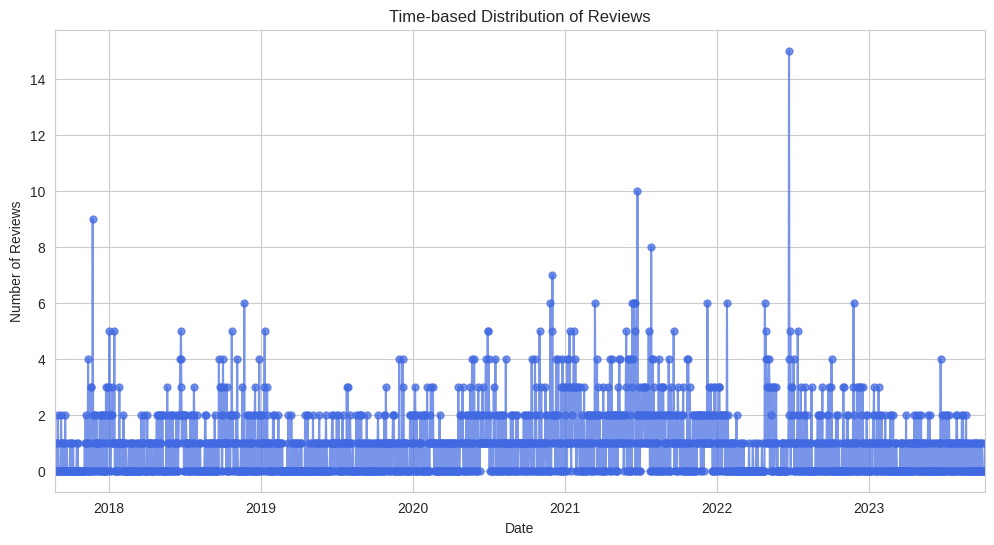

In [15]:
# Convert the 'date' column to a datetime format
df['date'] = pd.to_datetime(df['date'])

# Group reviews by day and count the number of reviews for each day
reviews_per_day = df.resample('D', on='date').size()

# Plot the time-based distribution of reviews with custom styling
plt.figure(figsize=(12, 6))
reviews_per_day.plot(color='royalblue', marker='o', markersize=5, alpha=0.7)
plt.title('Time-based Distribution of Reviews')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.style.use('seaborn-darkgrid')  # Apply a predefined style
plt.show()

## Word Cloud

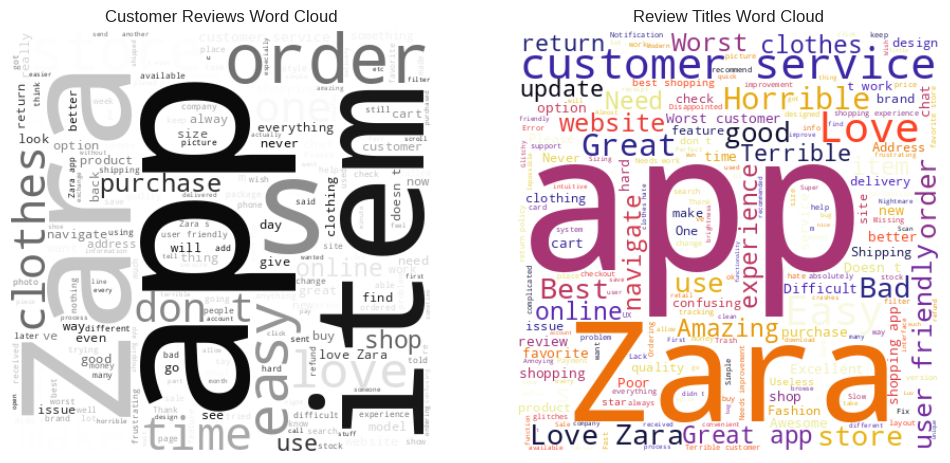

In [21]:
from wordcloud import WordCloud
import random

# Define custom color palettes for each word cloud
custom_palette_reviews = ['#FF5733', '#33FF57', '#3366FF', '#FF33D1', '#FFFF33']
custom_palette_titles = ['#33D1FF', '#FF3366', '#33FF57', '#FF5733', '#FFFF33']

# Combine all customer reviews into a single text
reviews_text = " ".join(df['review'])

# Combine all review titles into a single text
titles_text = " ".join(df['title'])

# Create word clouds for reviews and titles with custom color palettes
wordcloud_reviews = WordCloud(width=400, height=400, background_color='white', colormap=random.choice(plt.colormaps())).generate(reviews_text)
wordcloud_titles = WordCloud(width=400, height=400, background_color='white', colormap=random.choice(plt.colormaps())).generate(titles_text)

# Create subplots for side-by-side word clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot word cloud for customer reviews with custom color palette
axes[0].imshow(wordcloud_reviews, interpolation='bilinear')
axes[0].set_title('Customer Reviews Word Cloud')
axes[0].axis('off')

# Plot word cloud for review titles with custom color palette
axes[1].imshow(wordcloud_titles, interpolation='bilinear')
axes[1].set_title('Review Titles Word Cloud')
axes[1].axis('off')

plt.show()

## Clustering with Topic Modeling using LDA
### Step 1: Preprocessing text - Tokenizing sentences, stopwords removal and lemmatization

In [22]:
df_orig= df.copy()
df_orig.shape

(2000, 8)

In [23]:
def get_pos_tag(tag):
    """This function is used to get the part-of-speech(POS) for lemmatization"""

    if tag.startswith('N') or tag.startswith('J'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')

In [26]:
# Initialize the WordNet Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Define the stoplist
stoplist = set(stopwords.words('english'))

def preprocess(text):
    """ 1. Removes Punctuations
        2. Removes words smaller than 3 letters
        3. Converts into lowercase
        4. Lemmatizes words
        5. Removes Stopwords
    """
    punctuation= list(string.punctuation)
    doc_tokens= nltk.word_tokenize(text)
    word_tokens= [word.lower() for word in doc_tokens if not (word in punctuation or len(word)<=3)]

    # Lemmatize
    pos_tags=nltk.pos_tag(word_tokens)
#     print(pos_tags)
    doc_words=[wordnet_lemmatizer.lemmatize(word, pos=get_pos_tag(tag)) for word, tag in pos_tags]
    doc_words= [word for word in doc_words if word not in stoplist]
    return doc_words

df_clean = df_orig['review'].apply(preprocess)
df_clean.head()

0    [go-to, office, even, lazy, day, gift, family,...
1    [small, waisted, curvy, nice, size, desire, de...
2    [although, pricey, basic, design, willing, tak...
3    [large, order, need, change, shipping, address...
4    [review, customer, service, receive, item, ord...
Name: review, dtype: object

### Step 2: Data cleaning - Procure only nouns and adjectives to obtain meaningful topics

In [27]:
# Adding business stopwords to exclude

common_terms = ["wear", "look", "ordered", "color", "purchase", "order"]

# Convert the list to a set
common_terms_set = set(common_terms)

# Merge the two sets
stoplist = stoplist.union(common_terms_set)

In [28]:
# Tried multiple parts of speech and obtained best topic results using Nouns and Adjectives
def get_nouns_adjs(series):

    " Topic Modeling using only nouns and adjectives"

    pos_tags= nltk.pos_tag(series)
    all_adj_nouns= [word for (word, tag) in pos_tags if (tag=="NN" or tag=="NNS" or tag=="JJ")]
    return all_adj_nouns

df_nouns_adj = df_clean.apply(get_nouns_adjs)

### Step 3: Add bigrams to our corpus using Word2vec model from gensim

In [29]:
# Importing gensim related libraries
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim.corpora import Dictionary
from gensim.models import Phrases
from collections import Counter
from gensim.models import Word2Vec

In [30]:
docs= list(df_nouns_adj)
phrases = gensim.models.Phrases(docs, min_count=10, threshold=20)
bigram_model = gensim.models.phrases.Phraser(phrases)

In [31]:
def make_bigrams(texts):
    return [bigram_model[doc] for doc in texts]

# Form Bigrams
data_words_bigrams = make_bigrams(docs)

In [32]:
# Checkout most frequent bigrams :
bigram_counter1= Counter()
for key in phrases.vocab.keys():
    if key not in stopwords.words('english'):
        if len(str(key).split('_'))>1:
            bigram_counter1[key]+=phrases.vocab[key]

for key, counts in bigram_counter1.most_common(20):
    print(key,">>>>", counts)

customer_service >>>> 223
love_zara >>>> 89
place_order >>>> 63
easy_navigate >>>> 57
credit_card >>>> 40
shop_zara >>>> 35
item_cart >>>> 35
easy_shop >>>> 33
order_online >>>> 31
shop_online >>>> 31
zara_store >>>> 31
order_item >>>> 28
item_available >>>> 28
return_item >>>> 24
shopping_experience >>>> 24
item_order >>>> 23
user_friendly >>>> 23
order_zara >>>> 22
multiple_time >>>> 22
zara_customer >>>> 21


In [33]:
# Feeding the bigrams into a Word2Vec model produces more meaningful bigrams
from gensim.models import Word2Vec
from collections import Counter

# Define Word2Vec model settings
model_settings = {
    "vector_size": 100,
    "sg": 1,  # Skip-gram
    "hs": 0,  # Negative sampling
    "seed": 33,
    "epochs": 35
}

# Initialize the Word2Vec model
w2vmodel = Word2Vec(bigram_model[docs], **model_settings)

# Create a counter for bigrams
bigram_counter = Counter()

# Count and store meaningful bigrams
for key in w2vmodel.wv.key_to_index.keys():
    if len(key.split("_")) > 1:
        bigram_counter[key] += w2vmodel.wv.get_vecattr(key, "count")

# Print the top 30 bigrams
for key, counts in bigram_counter.most_common(30):
    print(key, ">>>>>", counts)

customer_service >>>>> 223
credit_card >>>>> 40
user_friendly >>>>> 23
return_policy >>>>> 19
gift_card >>>>> 18
error_message >>>>> 14
head_designer >>>>> 11


In [34]:
# Get the KeyedVectors from your Word2Vec model
wv = w2vmodel.wv

# Most often mentioned words along with the word 'return'
similar_words = wv.most_similar(positive=['return'], topn=10)

# Print the similar words
for word, score in similar_words:
    print(word, score)

communication 0.656795084476471
mail 0.649336040019989
accept 0.6386995315551758
fault 0.6329162120819092
slip 0.6265531778335571
print 0.6086516380310059
label 0.603564441204071
security 0.6032389402389526
wanted 0.5873897671699524
form 0.586480438709259


In [35]:
w2vmodel.wv.most_similar(['interface','design'], ['service'], topn=5)

[('step', 0.6277639865875244),
 ('original', 0.577331006526947),
 ('usability', 0.5615950226783752),
 ('intuitive', 0.5429579615592957),
 ('accessibility', 0.5356518626213074)]

### Step 4: Create a dictionary and corpus for input to our LDA model. Filter out the most common and uncommon words.

In [36]:
dictionary= Dictionary(data_words_bigrams)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.6)
corpus = [dictionary.doc2bow(doc) for doc in docs]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 257
Number of documents: 2000


### Step 5: Train the LDA model- Topic Modeling

In [37]:
import time
from gensim.models.ldamulticore import LdaMulticore

t0= time.time()
passes= 150
np.random.seed(1) # setting up random seed to get the same results
ldamodel= LdaMulticore(corpus,
                    id2word=dictionary,
                    num_topics=4,
#                   alpha='asymmetric',
                    chunksize= 4000,
                    batch= True,
                    minimum_probability=0.001,
                    iterations=350,
                    passes=passes)

t1= time.time()
print("time for",passes," passes: ",(t1-t0)," seconds")

time for 150  passes:  203.33668541908264  seconds


### Step 6: Analyze the topics

In [38]:
topics = ldamodel.show_topics(num_words=25, formatted=False)

for topic_id, topic in topics:
    print(f"Topic {topic_id + 1}:")
    for word, weight in topic:
        print(f"{word}: {weight:.4f}")
    print()

Topic 1:
item: 0.0448
size: 0.0446
look: 0.0256
product: 0.0234
search: 0.0226
model: 0.0214
site: 0.0183
shop: 0.0181
website: 0.0172
navigate: 0.0157
time: 0.0156
difficult: 0.0156
option: 0.0151
zara: 0.0143
hard: 0.0139
picture: 0.0136
user: 0.0133
please: 0.0133
scroll: 0.0125
show: 0.0123
page: 0.0119
filter: 0.0115
category: 0.0115
photo: 0.0115
list: 0.0111

Topic 2:
order: 0.1113
customer: 0.0596
service: 0.0469
zara: 0.0391
time: 0.0323
return: 0.0240
item: 0.0227
ship: 0.0201
call: 0.0185
online: 0.0185
store: 0.0168
package: 0.0153
place: 0.0145
money: 0.0144
day: 0.0142
receive: 0.0140
week: 0.0127
number: 0.0114
help: 0.0113
company: 0.0112
contact: 0.0111
email: 0.0107
track: 0.0105
wait: 0.0105
delivery: 0.0095

Topic 3:
item: 0.0953
purchase: 0.0559
time: 0.0373
cart: 0.0368
card: 0.0255
easy: 0.0239
work: 0.0239
available: 0.0232
shop: 0.0215
check: 0.0206
address: 0.0197
update: 0.0167
stock: 0.0159
option: 0.0158
return: 0.0149
use: 0.0142
sale: 0.0139
store: 0.0138

# Sentiment Analysis (Lexicon-Based Approach)

In [39]:
# Import the required packages
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [40]:
# Download NLTK data (if not already downloaded)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [41]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [42]:
# Define a function to calculate sentiment scores and determine sentiment
def get_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        sentiment = "positive"
    elif compound_score <= -0.05:
        sentiment = "negative"
    else:
        sentiment = "neutral"

    return sentiment, compound_score

In [43]:
# Combine 'reviews' and 'titles' into a single text column
df_orig['combined_text'] = df_orig['review'] + " " + df_orig['title']

In [44]:
# Apply the sentiment analysis function to each row and store results in separate columns
df_orig[['sentiment', 'compound_score']] = df_orig['combined_text'].apply(lambda x: pd.Series(get_sentiment(x)))

# Sentiment Visualization

## Word Cloud by sentiment

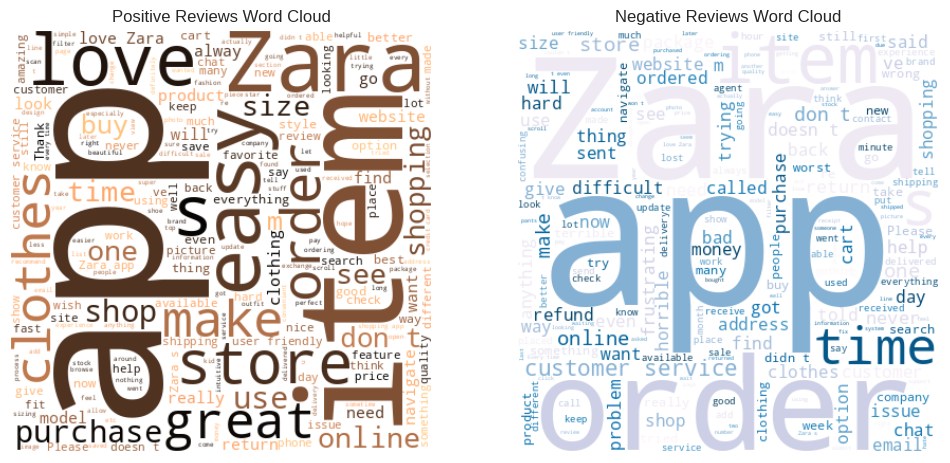

In [45]:
from wordcloud import WordCloud
import random
import matplotlib.pyplot as plt

# Combine all positive and negative reviews into single texts
positive_text = " ".join(df_orig[df_orig['sentiment'] == 'positive']['review'])
negative_text = " ".join(df_orig[df_orig['sentiment'] == 'negative']['review'])

# Define custom color palettes for positive and negative word clouds
custom_palette_positive = [random.choice(plt.colormaps()) for _ in range(5)]
custom_palette_negative = [random.choice(plt.colormaps()) for _ in range(5)]

# Create word clouds for positive and negative reviews with custom color palettes
wordcloud_positive = WordCloud(width=400, height=400, background_color='white', colormap=custom_palette_positive[0], max_words=200).generate(positive_text)
wordcloud_negative = WordCloud(width=400, height=400, background_color='white', colormap=custom_palette_negative[0], max_words=200).generate(negative_text)

# Create subplots for side-by-side word clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot word cloud for positive reviews with custom color palette
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].set_title('Positive Reviews Word Cloud')
axes[0].axis('off')

# Plot word cloud for negative reviews with custom color palette
axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].set_title('Negative Reviews Word Cloud')
axes[1].axis('off')

plt.show()

## Year vs Sentiment count

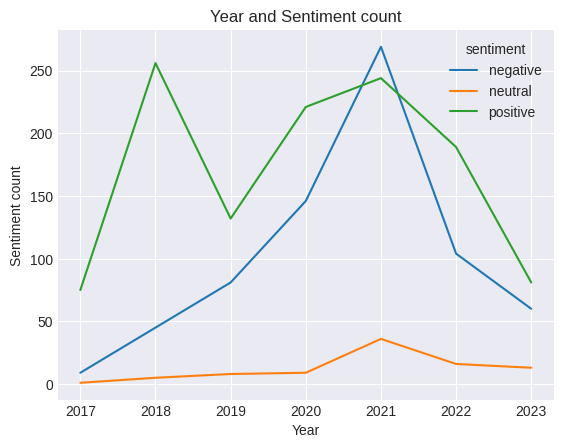

In [46]:
# Extract the year and create a new column 'year'
df_orig['year'] = df_orig['date'].dt.year

# Group by 'year' and 'sentiment' and count the occurrences
sentiment_counts = df_orig.groupby(['year', 'sentiment'])['sentiment'].count().unstack()

# Plot the sentiment counts
sentiment_counts.plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

## Day of month vs Reviews count

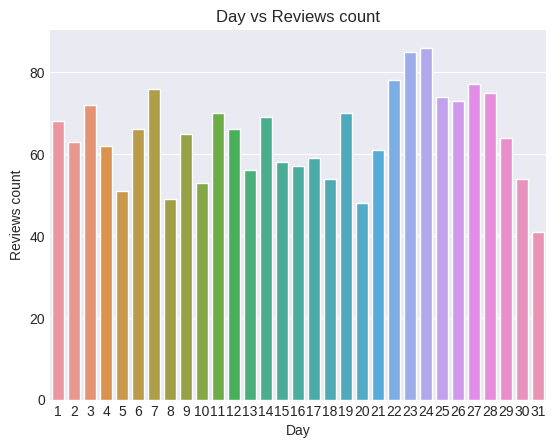

In [47]:
# Extract the day and create a new column 'day'
df_orig['day'] = df_orig['date'].dt.day

#Creating a dataframe
day=pd.DataFrame(df_orig.groupby('day')['review'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.barplot(x="day", y="review", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

## Sentiment score distribution

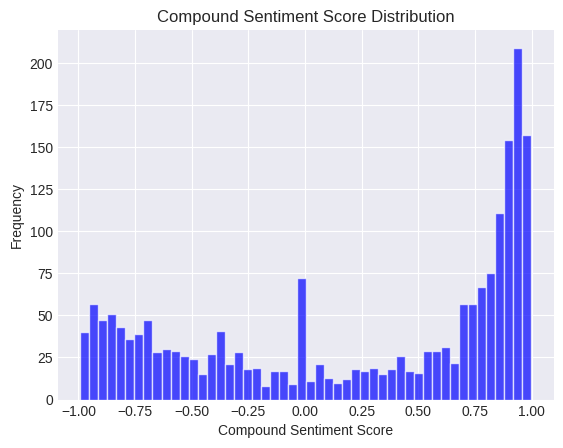

In [48]:
plt.hist(df_orig['compound_score'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Compound Sentiment Score Distribution')
plt.grid(True)
plt.show()

## Heatmap of sentiment

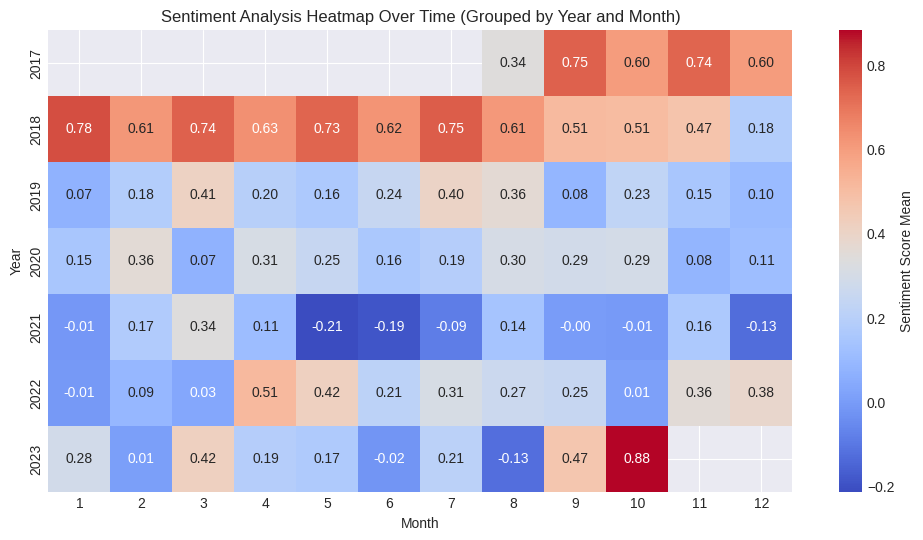

In [49]:
# Extract month and year from the 'date' column
df_orig['month'] = df_orig['date'].dt.month

# Create a pivot table to reshape the data for the heatmap, grouping by year and month
pivot_table = df_orig.pivot_table(index='year', columns='month', values='compound_score', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Sentiment Score Mean'})
plt.title('Sentiment Analysis Heatmap Over Time (Grouped by Year and Month)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


# Correlation Analysis & Outlier drilldown

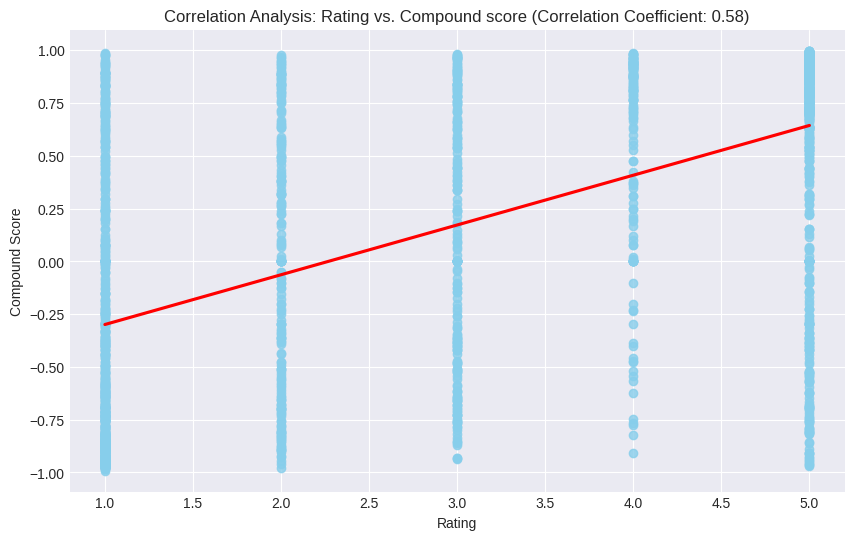

In [50]:
# Calculate the correlation coefficient
correlation_coefficient = df_orig['rating'].corr(df_orig['compound_score'])

# Create a scatter plot with regression line and different colors for each bar
plt.figure(figsize=(10, 6))
sns.regplot(x="rating", y="compound_score", data=df_orig, ci=None, color='skyblue', line_kws={'color': 'red'})
plt.title(f"Correlation Analysis: Rating vs. Compound score (Correlation Coefficient: {correlation_coefficient:.2f})")
plt.xlabel("Rating")
plt.ylabel("Compound Score")
plt.show()

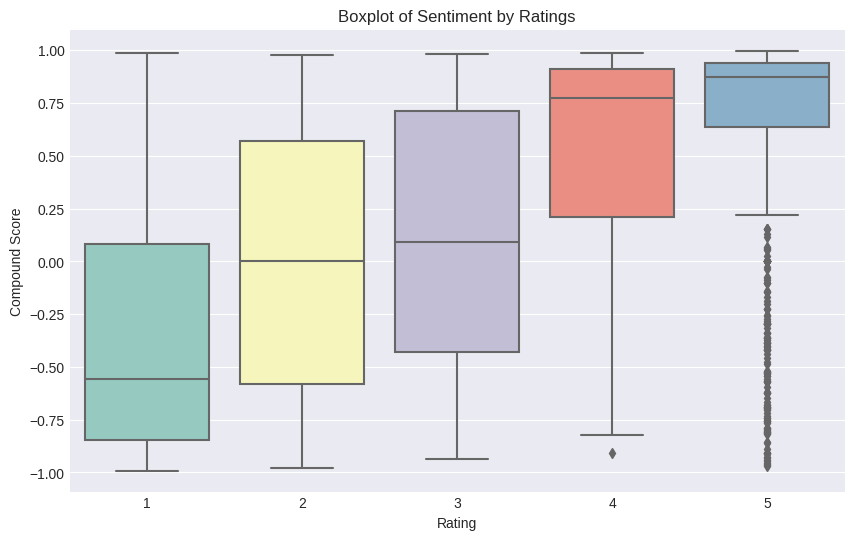

In [51]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='compound_score', data=df_orig, palette="Set3")
plt.title("Boxplot of Sentiment by Ratings")
plt.xlabel("Rating")
plt.ylabel("Compound Score")
plt.show()

#### We can see a lot of outliers within the **5-star reviews** given that the sentiment score is **negative**.

In [52]:
# Count the number of outliers
outliers_count = len(df_orig[(df_orig['sentiment'] == 'negative') & (df['rating'] == 5)])

# Count the total number of 5-star reviews
total_5_star_reviews = len(df_orig[df_orig['rating'] == 5])

# Count the total number of negative reviews
total_negative_reviews = len(df_orig[df_orig['sentiment'] == 'negative'])

# Print the counts
print("Number of Outliers (Negative Sentiment in 5-Star Reviews):", outliers_count)
print("Total Number of 5-Star Reviews:", total_5_star_reviews)
print("Total Number of Negative Reviews:", total_negative_reviews)

# Calculate the percentage of negative sentiment in 5-star reviews
percentage_negative_in_5_star = (outliers_count / total_5_star_reviews) * 100
print("Percentage of Negative Sentiment in 5-Star Reviews:", percentage_negative_in_5_star, "%")

# Filter the DataFrame to get negative sentiment 5-star reviews
outliers_df = df_orig[(df_orig['sentiment'] == 'negative') & (df_orig['rating'] == 5)]

Number of Outliers (Negative Sentiment in 5-Star Reviews): 113
Total Number of 5-Star Reviews: 854
Total Number of Negative Reviews: 714
Percentage of Negative Sentiment in 5-Star Reviews: 13.23185011709602 %


In [53]:
outlier_clean = outliers_df['review'].apply(preprocess)
outlier_nouns_adj = outlier_clean.apply(get_nouns_adjs)
doc= list(outlier_nouns_adj)
phrases = gensim.models.Phrases(doc, min_count=10, threshold=20)
bigram_model = gensim.models.phrases.Phraser(phrases)
# Checkout most frequent bigrams :
bigram_counter1= Counter()
for key in phrases.vocab.keys():
    if key not in stopwords.words('english'):
        if len(str(key).split('_'))>1:
            bigram_counter1[key]+=phrases.vocab[key]

for key, counts in bigram_counter1.most_common(20):
    print(key,">>>>", counts)

customer_service >>>> 13
item_cart >>>> 4
item_available >>>> 4
call_customer >>>> 3
item_item >>>> 3
service_costumer >>>> 2
zara_customer >>>> 2
something_wrong >>>> 2
item_cancel >>>> 2
zara_time >>>> 2
wait_agent >>>> 2
return_policy >>>> 2
show_clothes >>>> 2
card_option >>>> 2
credit_card >>>> 2
item_prepared. >>>> 2
prepared._item >>>> 2
hard_find >>>> 2
love_zara >>>> 2
user_experience >>>> 2


customer_service" is the most common bigram, suggesting that customers frequently mention their experiences with customer service. Zara might need to pay attention to customer service quality and responsiveness within their app.

# Predictive Modelling: SVM

In [54]:
zara = df_orig.copy()

# Save the 'zara' DataFrame as a CSV file
zara.to_csv('zara.csv', index=False)

              precision    recall  f1-score   support

    negative       0.80      0.74      0.77       142
    positive       0.85      0.89      0.87       241

    accuracy                           0.83       383
   macro avg       0.82      0.81      0.82       383
weighted avg       0.83      0.83      0.83       383



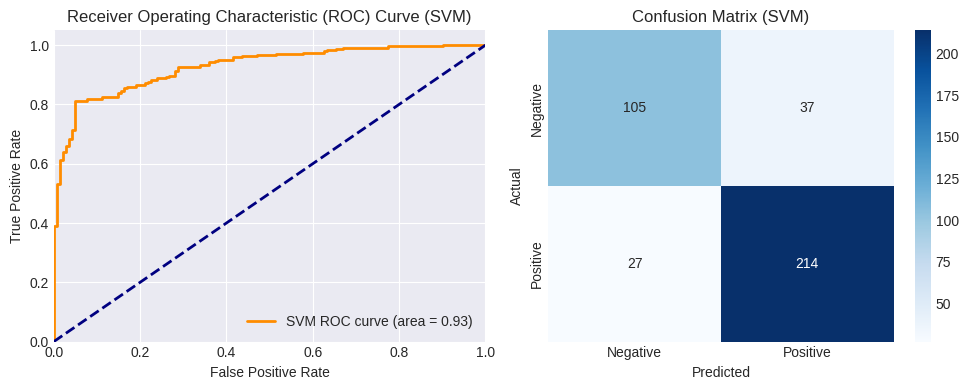

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load your "zara" dataset
zara = pd.read_csv('zara.csv')

# Create a new DataFrame "df0" to store the filtered data
df0 = zara[zara['sentiment'] != 'neutral'].copy()

# Split the data into training and testing sets
X = df0['combined_text']  # Features
y = df0['sentiment']  # Labels (positive or negative)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train an SVM classifier
clf = SVC(kernel='linear', C=1.0, probability=True)
clf.fit(X_train_tfidf, y_train)

# Make predictions
y_scores = clf.predict_proba(X_test_tfidf)[:, 1]  # Use predicted probabilities for positive class

# Calculate ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_scores, pos_label='positive')  # Specify pos_label
roc_auc = auc(fpr, tpr)

# Plot SVM ROC curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'SVM ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (SVM)')
plt.legend(loc='lower right')

# Calculate confusion matrix for SVM
y_pred = clf.predict(X_test_tfidf)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')

# Display classification metrics
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

plt.tight_layout()
plt.show()

# Predictive Modelling: Naive Bayes

              precision    recall  f1-score   support

    Negative       0.92      0.34      0.49       142
    Positive       0.72      0.98      0.83       241

    accuracy                           0.74       383
   macro avg       0.82      0.66      0.66       383
weighted avg       0.79      0.74      0.70       383



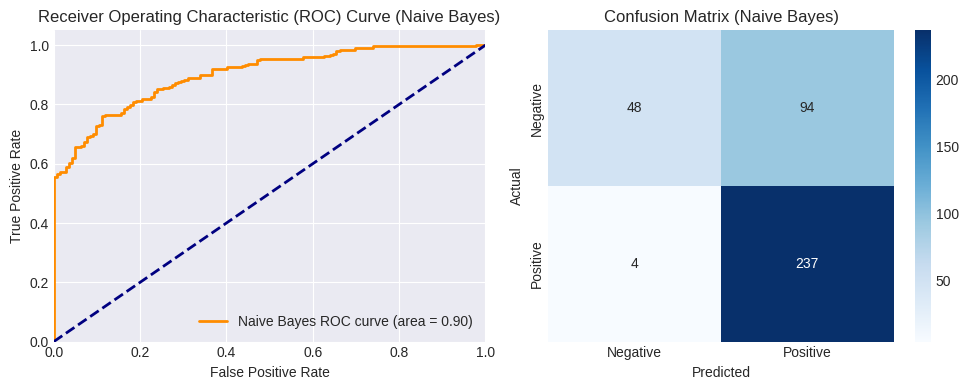

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter the dataset to exclude the "neutral" class
df1 = zara[zara['sentiment'] != 'neutral']

# Separate features (X) and target (y)
X = df1['combined_text']
y = (df1['sentiment'] == 'positive').astype(int)  # Convert labels to binary (1 for positive, 0 for negative)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Make predictions
y_scores = clf.predict_proba(X_test_tfidf)[:, 1]  # Use predicted probabilities for positive class

# Calculate ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot Naive Bayes ROC curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Naive Bayes ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Naive Bayes)')
plt.legend(loc='lower right')

# Calculate confusion matrix for Naive Bayes
y_pred = clf.predict(X_test_tfidf)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Naive Bayes)')

# Display classification metrics
classification_rep = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print(classification_rep)

plt.tight_layout()
plt.show()

# Predictive Modelling: Logistic Regression

              precision    recall  f1-score   support

    Negative       0.85      0.68      0.75       142
    Positive       0.83      0.93      0.88       241

    accuracy                           0.84       383
   macro avg       0.84      0.80      0.81       383
weighted avg       0.84      0.84      0.83       383



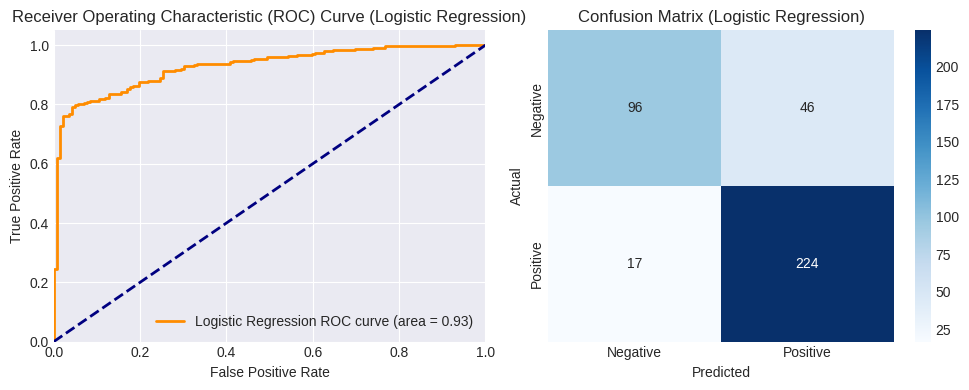

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset to exclude the "neutral" class
df1 = zara[zara['sentiment'] != 'neutral']

# Separate features (X) and target (y)
X = df1['combined_text']
y = (df1['sentiment'] == 'positive').astype(int)  # Convert labels to binary (1 for positive, 0 for negative)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

# Make predictions
y_scores = clf.predict_proba(X_test_tfidf)[:, 1]  # Use predicted probabilities for positive class

# Calculate ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot Logistic Regression ROC curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Logistic Regression)')
plt.legend(loc='lower right')

# Calculate confusion matrix for Logistic Regression
y_pred = clf.predict(X_test_tfidf)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')

# Display classification metrics
classification_rep = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print(classification_rep)

plt.tight_layout()
plt.show()

# Predictive Modeling: LSTM

Epoch 1/5
43/43 [==============================] - 5s 64ms/step - loss: 0.6316 - accuracy: 0.6308 - val_loss: 0.4978 - val_accuracy: 0.7059
Epoch 2/5
43/43 [==============================] - 2s 52ms/step - loss: 0.3680 - accuracy: 0.8459 - val_loss: 0.4051 - val_accuracy: 0.7974
Epoch 3/5
43/43 [==============================] - 3s 58ms/step - loss: 0.1770 - accuracy: 0.9375 - val_loss: 0.4093 - val_accuracy: 0.8562
Epoch 4/5
43/43 [==============================] - 3s 76ms/step - loss: 0.0840 - accuracy: 0.9738 - val_loss: 0.4246 - val_accuracy: 0.8301
Epoch 5/5
12/12 [==============================] - 1s 17ms/step
              precision    recall  f1-score   support

    Negative       0.73      0.80      0.77       142
    Positive       0.88      0.83      0.85       241

    accuracy                           0.82       383
   macro avg       0.80      0.81      0.81       383
weighted avg       0.82      0.82      0.82       383



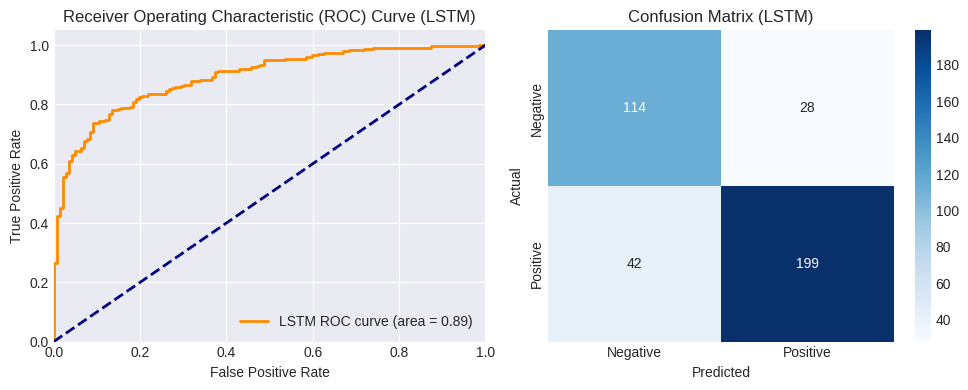

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Filter the dataset to exclude the "neutral" class
df1 = zara[zara['sentiment'] != 'neutral']

# Separate features (X) and target (y)
X = df1['combined_text']
y = (df1['sentiment'] == 'positive').astype(int)  # Convert labels to binary (1 for positive, 0 for negative)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_sequence_length = 100  # Define the maximum sequence length
tokenizer = Tokenizer(num_words=5000)  # Create a tokenizer with a limited vocabulary
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Make predictions
y_scores = model.predict(X_test_padded)
y_pred = (y_scores > 0.5).astype(int)

# Calculate ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot LSTM ROC curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'LSTM ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (LSTM)')
plt.legend(loc='lower right')

# Calculate confusion matrix for LSTM
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LSTM)')

# Display classification metrics
classification_rep = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print(classification_rep)

plt.tight_layout()
plt.show()